In [2]:
import pandas as pd
import numpy as np


# Load the dataset
df = pd.read_csv('D:\projects\Codrelate\Codrelate 2025 Problem Statement\AI-Powered Content Analysis and Recommendation.csv')
print('shape of the dataset:', df.shape)


shape of the dataset: (192368, 6)


Now, the data cleaning takes place


In [3]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Handle missing values
print('missing values in the dataset:', df.isnull().sum())

# Fill missing values with appropriate defaults
df['title'].fillna('Unknown', inplace=True) # Use 'Unknown' for missing titles
df['text'].fillna('Unknown', inplace=True) # Use 'Unknown' for missing text
df['url'].fillna('No URL', inplace=True) # Use 'No URL' for missing URLs
df['authors'].fillna('[]', inplace=True)  # Empty list for no authors
df['tags'].fillna('[]', inplace=True)     # Empty list for no tags
df['timestamp'].fillna('Unknown', inplace=True)  # Use 'Unknown' for missing timestamps

missing values in the dataset: title        5
text         0
url          0
authors      0
timestamp    2
tags         0
dtype: int64


In [5]:
# Standardize timestamps to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S.%f%z', errors='coerce')

# Remove duplicates based on URL or title + timestamp
df.drop_duplicates(subset=['url'], inplace=True)
df.drop_duplicates(subset=['title', 'timestamp'], inplace=True)

In [6]:
import re

# Clean text: remove special characters, extra whitespace
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)) if pd.notnull(x) else '')
df['text'] = df['text'].apply(lambda x: ' '.join(x.split()))

# Cleaning process completed

From here, the data of the datasets are explored.


In [7]:
# Descriptive statistics
print('Descriptive statistics of the dataset:')
# Display descriptive statistics for all columns    
print(df.describe(include='all'))

Descriptive statistics of the dataset:
                        title  \
count                  191676   
unique                 187892   
top     by Martino Pietropoli   
freq                       93   
mean                      NaN   
min                       NaN   
25%                       NaN   
50%                       NaN   
75%                       NaN   
max                       NaN   

                                                     text  \
count                                              191676   
unique                                             185274   
top     Learn more Medium is an open platform where 17...   
freq                                                 1976   
mean                                                  NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                             

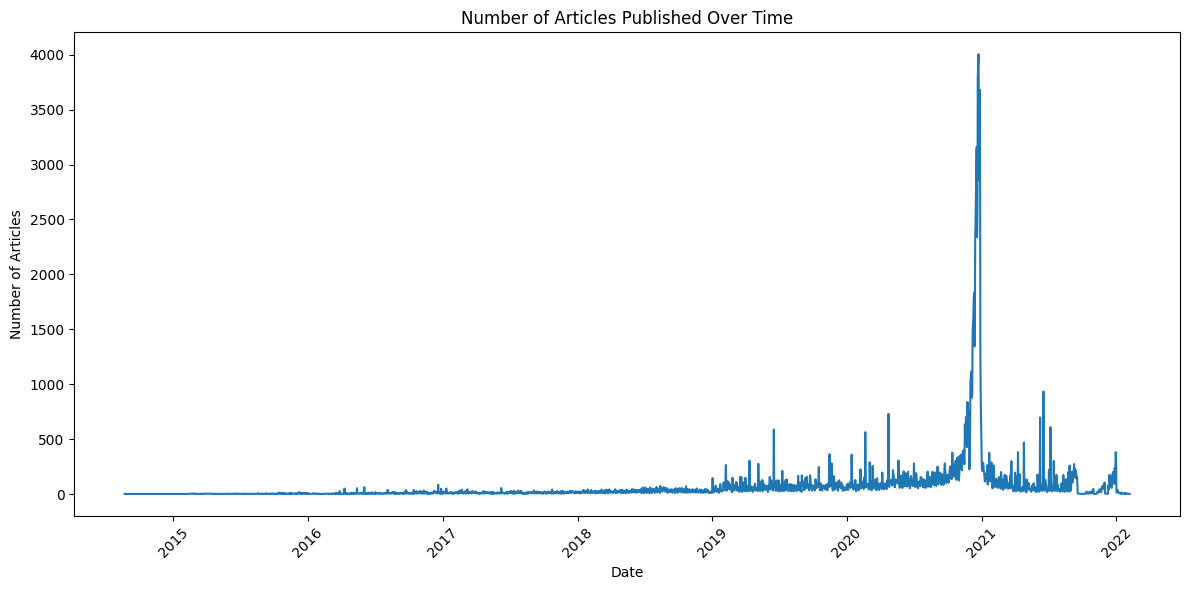

In [8]:
import matplotlib.pyplot as plt

# Temporal Analysis
plt.figure(figsize=(12, 6))
df['timestamp'].dt.date.value_counts().sort_index().plot(kind='line')
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the above graph, it is evident that htere is an increase of articles published at the end of 2020 to start of 2021 

In [10]:
# Top Authors and Tags
all_authors = [author for sublist in df['authors'] for author in sublist if sublist]  # Flatten list
all_tags = [tag for sublist in df['tags'] for tag in sublist if sublist]

print('Top 10 Authors:', pd.Series(all_authors).value_counts().head(10))
print('Top 10 Tags:', pd.Series(all_tags).value_counts().head(10))

Top 10 Authors: '    326704
a    232503
     197767
[    191676
]    191676
e    182045
i    150336
n    147652
r    133659
o    109104
Name: count, dtype: int64
Top 10 Tags: '    1754548
     1038704
e     880831
i     726080
,     685600
n     636890
t     579911
a     577406
o     557188
r     526106
Name: count, dtype: int64


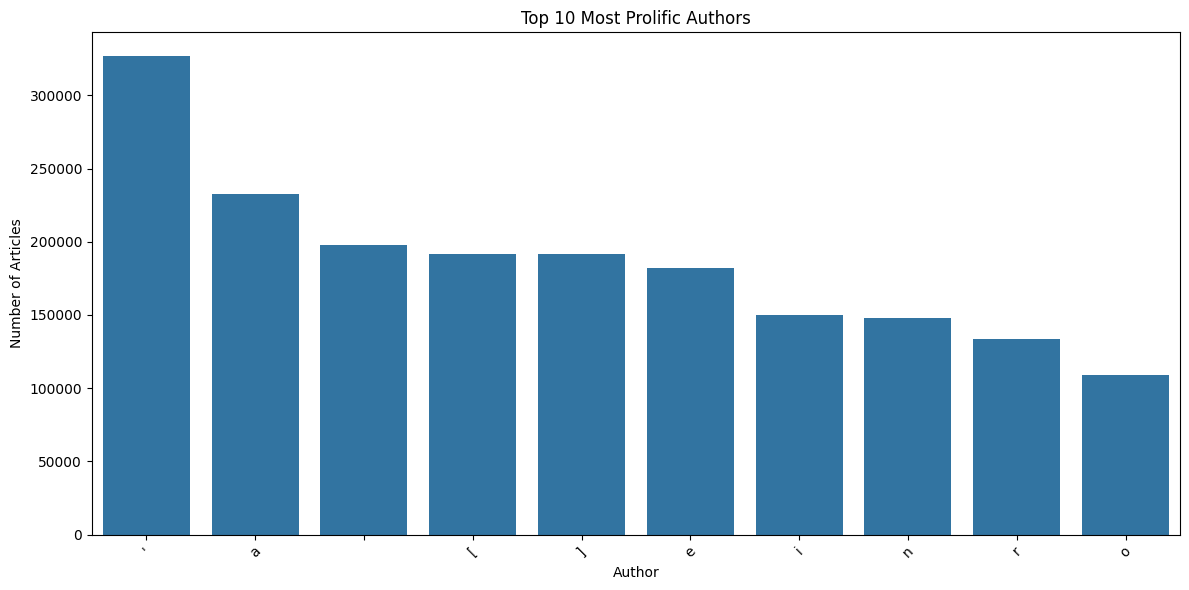

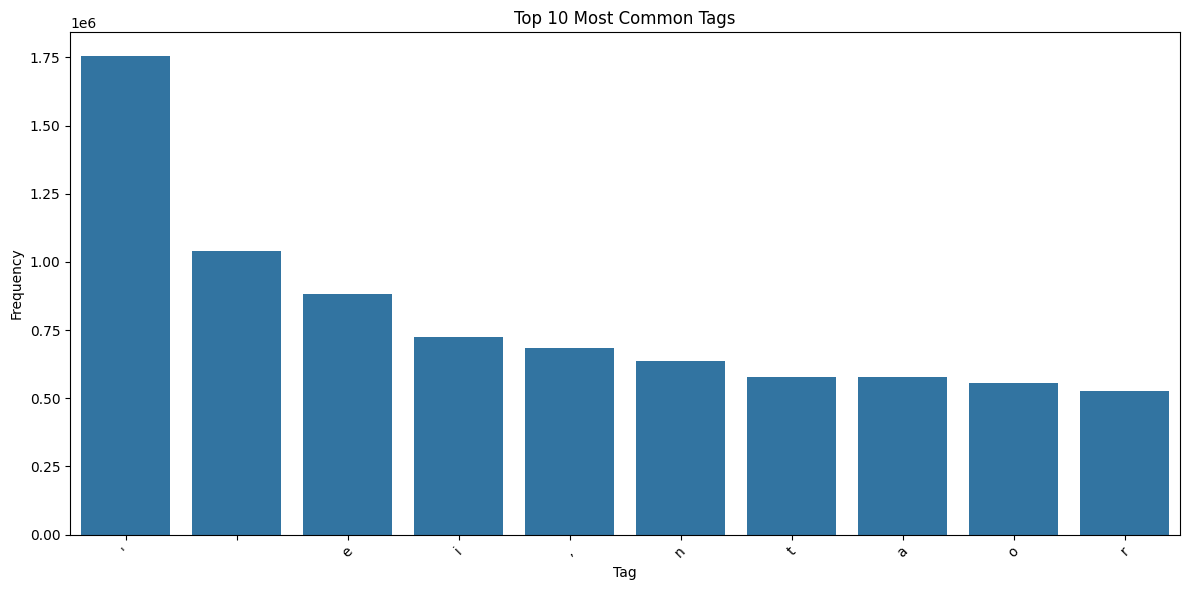

In [9]:
from collections import Counter
import seaborn as sns

# Top Authors and Tags
all_authors = [author for sublist in df['authors'] for author in sublist if sublist]  # Flatten list
all_tags = [tag for sublist in df['tags'] for tag in sublist if sublist]

plt.figure(figsize=(12, 6))
sns.barplot(x=list(dict(Counter(all_authors).most_common(10)).keys()), 
                y=list(dict(Counter(all_authors).most_common(10)).values()))
plt.title('Top 10 Most Prolific Authors')
plt.xlabel('Author')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=list(dict(Counter(all_tags).most_common(10)).keys()), 
                y=list(dict(Counter(all_tags).most_common(10)).values()))
plt.title('Top 10 Most Common Tags')
plt.xlabel('Tag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()